In [1075]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model, preprocessing
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import sklearn
import warnings
warnings.simplefilter('ignore')

In [1076]:
pd.set_option('display.max_row', None)
pd.set_option('display.max_columns', None)

In [1127]:
house_data=pd.read_csv(r'C:\Users\tt172\Pictures\house-prices-advanced-regression-techniques\train.csv')
house_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [1078]:
#GET A BASIC SUMMARY OF THE DATA DISTRIBUTION 
from ydata_profiling import ProfileReport
profile = ProfileReport(house_data, title="Profiling Report")
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
house_data.shape

(1460, 81)

In [9]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1071]:
house_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

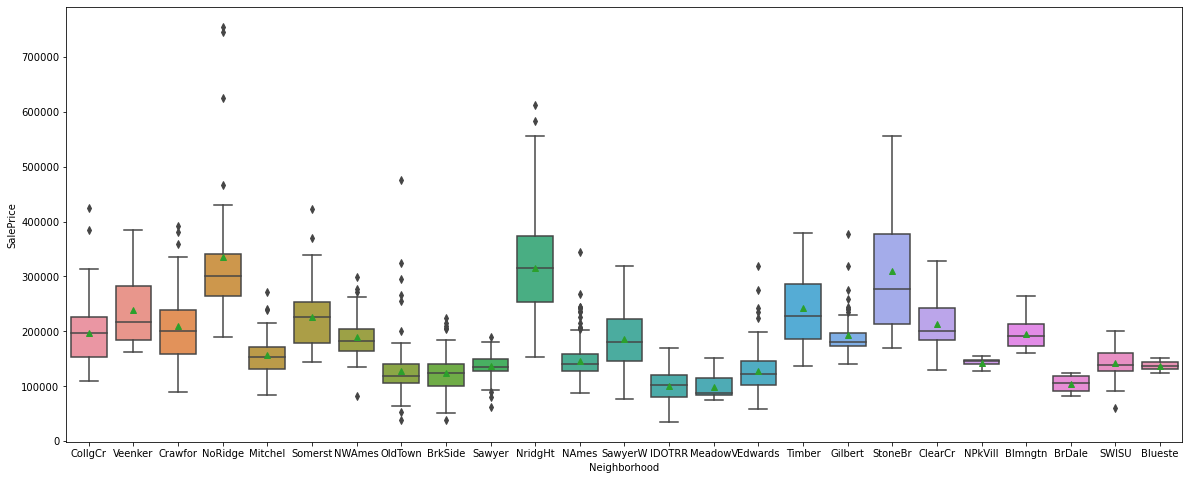

In [27]:
plt.figure(figsize=(20,8))
sns.boxplot(house_data, y='SalePrice', x='Neighborhood', showmeans=True)

<AxesSubplot:xlabel='HouseStyle', ylabel='SalePrice'>

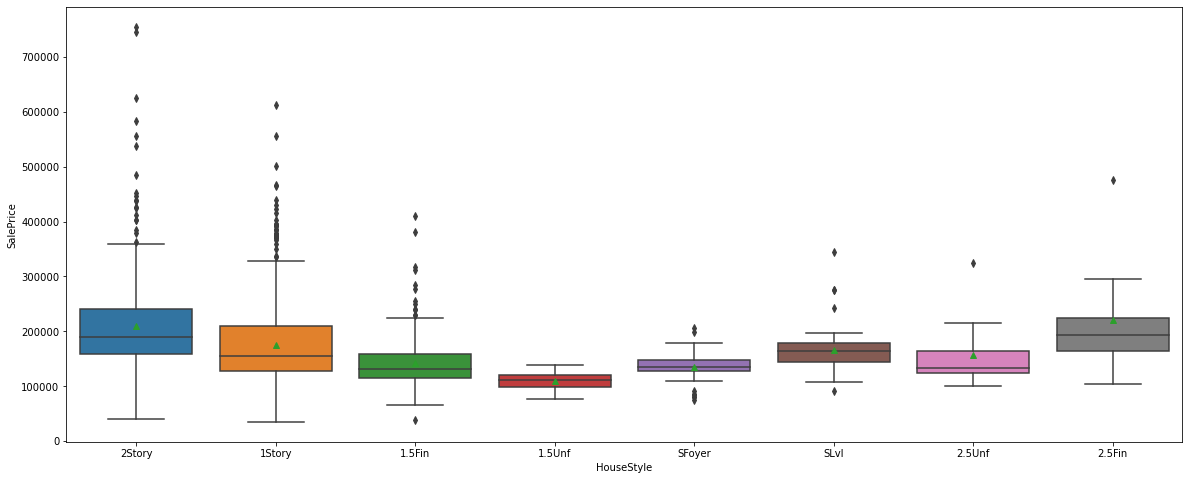

In [1102]:
plt.figure(figsize=(20,8))
sns.boxplot(house_data, y='SalePrice', x='HouseStyle', showmeans=True)

<AxesSubplot:xlabel='Foundation', ylabel='SalePrice'>

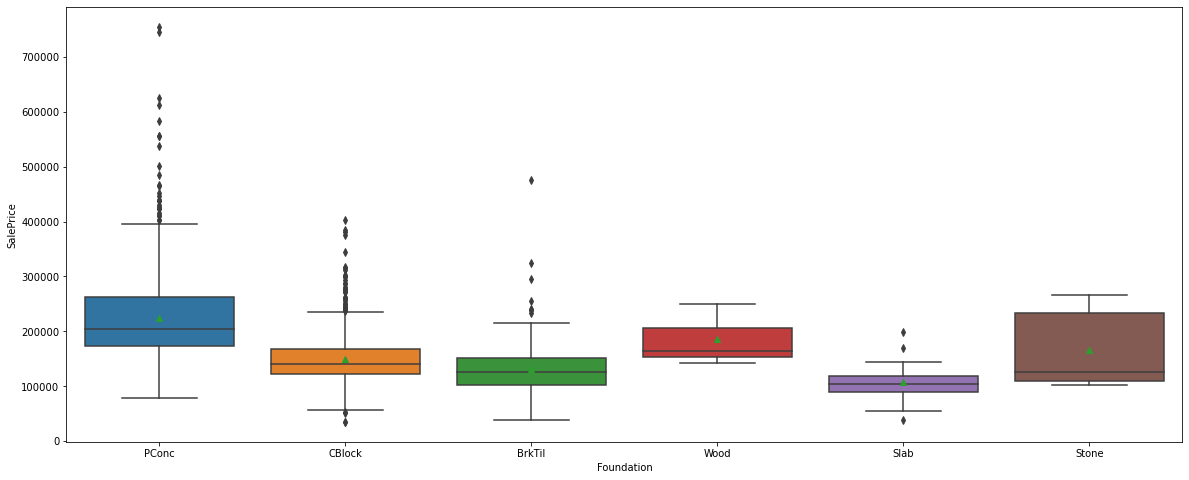

In [1063]:
plt.figure(figsize=(20,8))
sns.boxplot(house_data, y='SalePrice', x='Foundation', showmeans=True)

<AxesSubplot:>

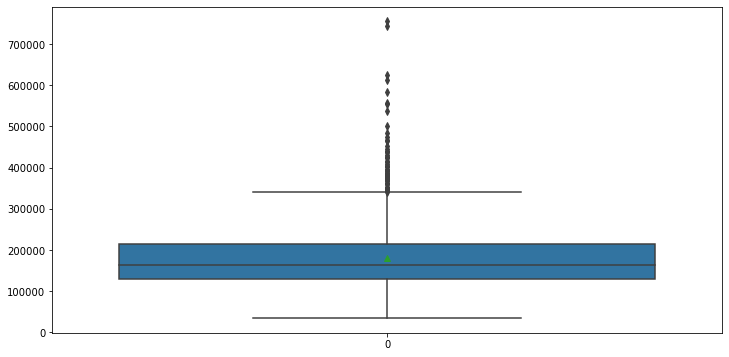

In [1068]:
plt.figure(figsize=(12,6))
sns.boxplot(house_data['SalePrice'], showmeans=True)

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

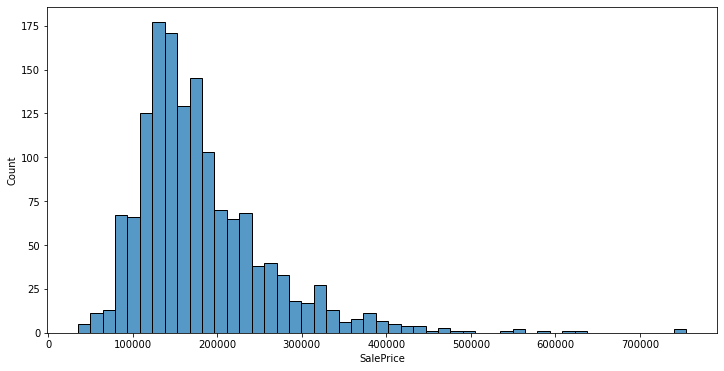

In [1069]:
plt.figure(figsize=(12,6))
sns.histplot(house_data['SalePrice'])

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

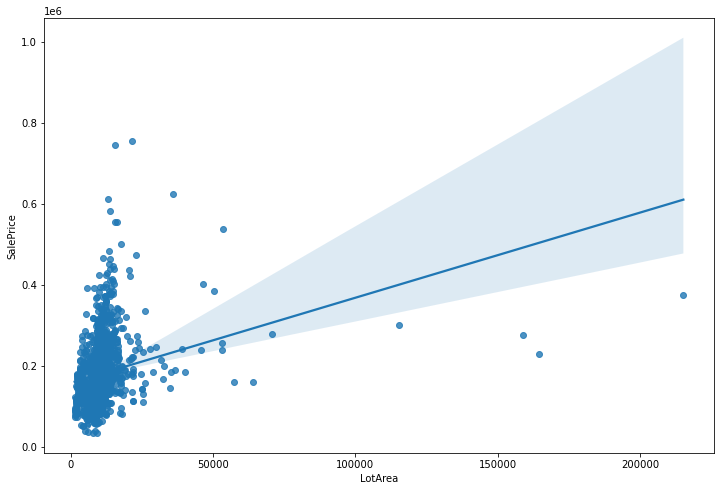

In [1070]:
plt.figure(figsize=(12,8))
sns.regplot(house_data,y='SalePrice', x='LotArea')

<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

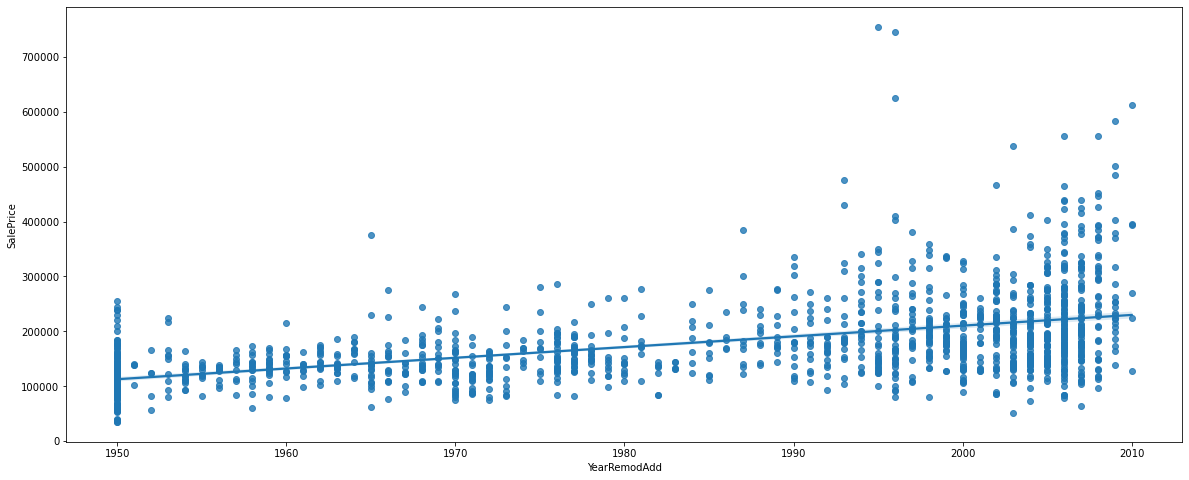

In [44]:
plt.figure(figsize=(20,8))
sns.regplot(house_data,y='SalePrice', x='YearRemodAdd')

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

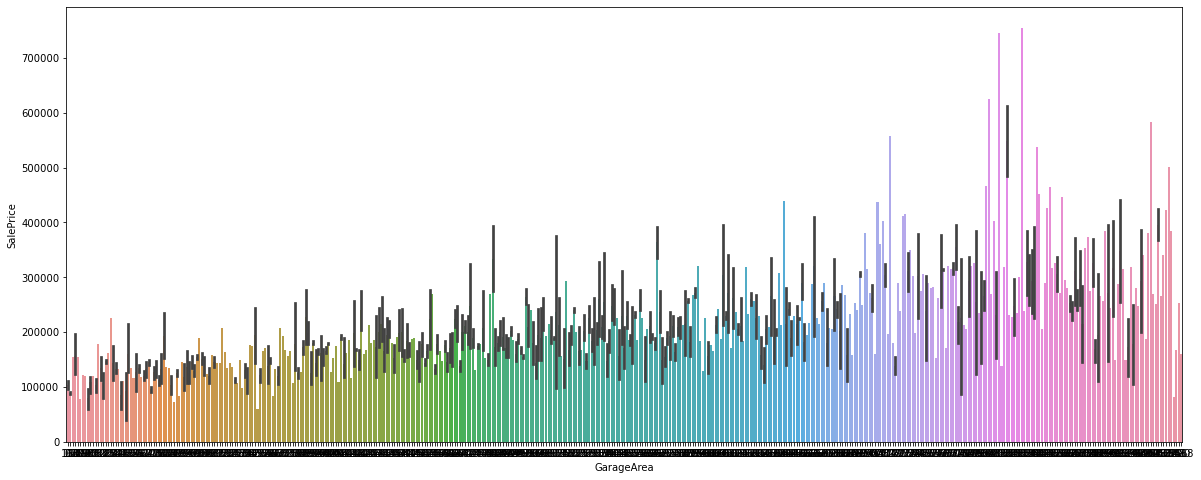

In [72]:
plt.figure(figsize=(20,8))
sns.barplot(house_data,y='SalePrice', x='GarageArea')

In [1072]:
house_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [1073]:
null_value_percentage=house_data.isnull().sum()*100/len(house_data)

In [1074]:
print(round(null_value_percentage,2))

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [1128]:
# DROP COLUMNS WITH NULL VALUE ABOVE 45%
house_data=house_data.drop(columns=['PoolQC','MiscFeature','Fence','FireplaceQu','Alley','Id'])

In [1124]:
house_data.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
44,20,RL,70.0,7945,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1959,1959,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,179,BLQ,506,465,1150,GasA,Ex,Y,FuseA,1150,0,0,1150,1,0,1,0,3,1,TA,6,Typ,0,Attchd,1959.0,RFn,1,300,TA,TA,Y,0,0,0,0,0,0,0,5,2006,WD,Normal,141000
181,70,RL,54.0,7588,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,6,1920,1950,Gable,CompShg,Stucco,Stucco,None,0.0,TA,TA,BrkTil,Fa,TA,No,LwQ,352,Unf,0,441,793,GasA,Gd,Y,SBrkr,901,901,0,1802,0,0,1,1,4,1,TA,9,Typ,1,Detchd,1920.0,Unf,1,216,Fa,TA,Y,0,0,40,0,0,0,0,7,2006,WD,Normal,200100
721,120,RM,NaN,4426,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,TwnhsE,1Story,6,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,169.0,Gd,TA,PConc,Gd,TA,Av,GLQ,662,Unf,0,186,848,GasA,Ex,Y,SBrkr,848,0,0,848,1,0,1,0,1,1,Gd,3,Typ,0,Attchd,2004.0,RFn,2,420,TA,TA,Y,160,0,0,0,0,0,0,5,2010,WD,Normal,143000
42,85,RL,NaN,9180,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,SFoyer,5,7,1983,1983,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,ALQ,747,LwQ,93,0,840,GasA,Gd,Y,SBrkr,884,0,0,884,1,0,1,0,2,1,Gd,5,Typ,0,Attchd,1983.0,RFn,2,504,TA,Gd,Y,240,0,0,0,0,0,0,12,2007,WD,Normal,144000
1012,70,RL,55.0,10592,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,6,7,1923,1996,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Gd,PConc,TA,Fa,No,Unf,0,Unf,0,602,602,GasA,TA,Y,SBrkr,900,602,0,1502,0,0,1,1,3,1,Gd,7,Typ,2,Detchd,1923.0,Unf,1,180,TA,TA,Y,96,0,112,0,53,0,0,8,2007,WD,Normal,165000


In [1090]:
house_data.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath     

In [1091]:
#FEATURES SELECTION
corrmat=house_data.corr()

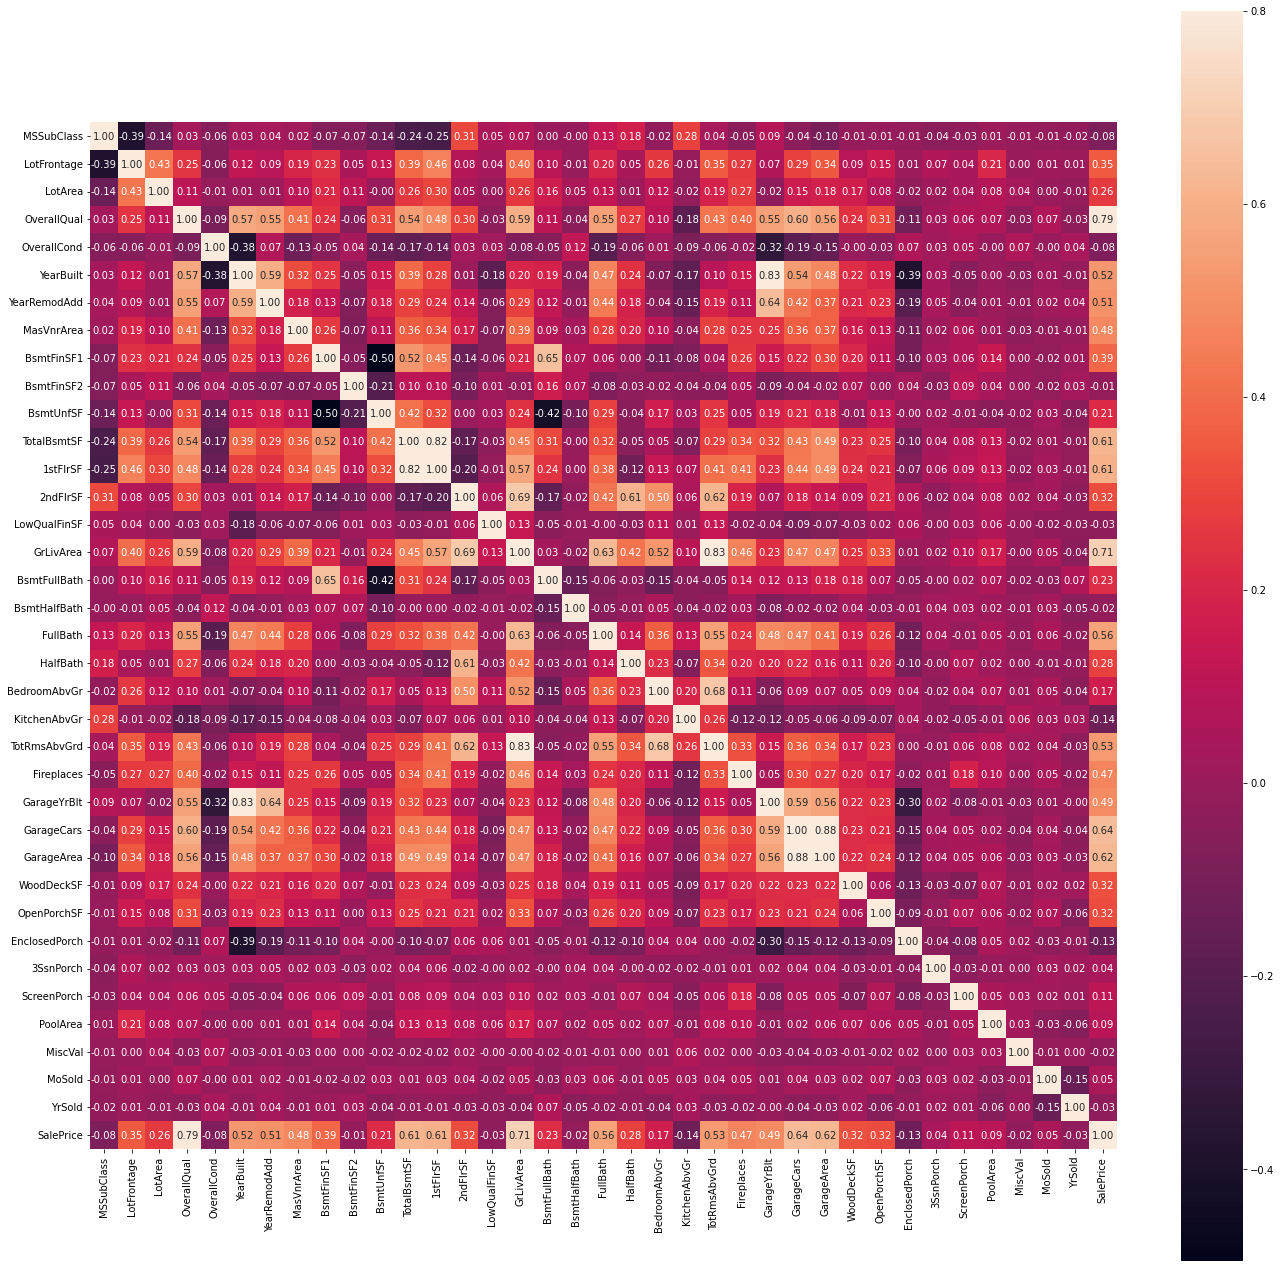

In [1093]:
f, ax=plt.subplots(figsize=(23,23))
sns.heatmap(corrmat, 
            vmax=0.8,
            square=True,
            annot=True, 
            fmt='0.2f');

In [1108]:
house_data[house_data['SalePrice']>=600000]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,60,RL,104.0,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,0,1,2007,WD,Normal,755000
898,20,RL,100.0,12919,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2009,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2188,Unf,0,142,2330,GasA,Ex,Y,SBrkr,2364,0,0,2364,1,0,2,1,2,1,Ex,11,Typ,2,Attchd,2009.0,Fin,3,820,TA,TA,Y,0,67,0,0,0,0,0,3,2010,New,Partial,611657
1169,60,RL,118.0,35760,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1995,1996,Hip,CompShg,HdBoard,HdBoard,BrkFace,1378.0,Gd,Gd,PConc,Ex,TA,Gd,GLQ,1387,Unf,0,543,1930,GasA,Ex,Y,SBrkr,1831,1796,0,3627,1,0,3,1,4,1,Gd,10,Typ,1,Attchd,1995.0,Fin,3,807,TA,TA,Y,361,76,0,0,0,0,0,7,2006,WD,Normal,625000
1182,60,RL,160.0,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,0,7,2007,WD,Abnorml,745000


In [1115]:
house_data[house_data['SalePrice']<=100000]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,90,RL,72.0,10791,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1296,0,0,1296,0,0,2,0,2,2,TA,6,Typ,0,CarPort,1967.0,Unf,2,516,TA,TA,Y,0,0,0,0,0,0,500,10,2006,WD,Normal,90000
29,30,RM,60.0,6324,Pave,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,Feedr,RRNn,1Fam,1Story,4,6,1927,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,520,520,GasA,Fa,N,SBrkr,520,0,0,520,0,0,1,0,1,1,Fa,4,Typ,0,Detchd,1920.0,Unf,1,240,Fa,TA,Y,49,0,87,0,0,0,0,5,2008,WD,Normal,68500
30,70,C (all),50.0,8500,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,649,649,GasA,TA,N,SBrkr,649,668,0,1317,0,0,1,0,3,1,TA,6,Typ,0,Detchd,1920.0,Unf,1,250,TA,Fa,N,0,54,172,0,0,0,0,7,2008,WD,Normal,40000
39,90,RL,65.0,6040,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,0,6,2008,WD,AdjLand,82000
68,30,RM,47.0,4608,Pave,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Artery,Norm,1Fam,1Story,4,6,1945,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,TA,TA,No,Unf,0,Unf,0,747,747,GasA,TA,Y,SBrkr,747,0,0,747,0,0,1,0,2,1,TA,4,Typ,0,Attchd,1945.0,Unf,1,220,TA,TA,Y,0,0,0,0,0,0,0,6,2010,WD,Normal,80000
75,180,RM,21.0,1596,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SLvl,4,5,1973,1973,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,462,Unf,0,0,462,GasA,TA,Y,SBrkr,526,462,0,988,1,0,1,0,2,1,TA,5,Typ,0,BuiltIn,1973.0,Unf,1,297,TA,TA,Y,120,101,0,0,0,0,0,11,2009,WD,Normal,91000
88,50,C (all),105.0,8470,Pave,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,3,2,1915,1982,Hip,CompShg,Plywood,Plywood,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0,Unf,0,1013,1013,GasA,TA,N,SBrkr,1013,0,513,1526,0,0,1,0,2,1,Fa,6,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,156,0,0,0,0,10,2009,ConLD,Abnorml,85000
91,20,RL,85.0,8500,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,3,1961,1961,Hip,CompShg,HdBoard,HdBoard,BrkCmn,203.0,TA,TA,CBlock,TA,TA,No,Rec,600,Unf,0,635,1235,GasA,TA,Y,SBrkr,1235,0,0,1235,0,0,1,0,2,1,TA,6,Typ,0,Attchd,1961.0,Unf,2,480,TA,TA,Y,0,0,0,0,0,0,0,12,2006,WD,Abnorml,98600
97,20,RL,73.0,10921,Pave,Reg,HLS,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1965,1965,Hip,CompShg,HdBoard,HdBoard,BrkFace,48.0,TA,TA,CBlock,TA,TA,No,Rec,520,Unf,0,440,960,GasA,TA,Y,FuseF,960,0,0,960,1,0,1,0,3,1,TA,6,Typ,0,Attchd,1965.0,Fin,1,432,TA,TA,P,120,0,0,0,0,0,0,5,2007,WD,Normal,94750
98,30,RL,85.0,10625,Pave,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,ALQ,108,Unf,0,350,458,GasA,Fa,N,SBrkr,835,0,0,835,0,0,1,0,2,1,TA,5,Typ,0,Basment,1920.0,Unf,1,366,Fa,TA,Y,0,0,77,0,0,0,400,5,2010,COD,Abnorml,83000


In [1129]:
house_data=house_data.drop(columns=['LotFrontage','MSSubClass','Street','LotShape','MSZoning',
                                    'LandContour','Utilities','LotConfig','LandSlope',
                                    'Condition1','MasVnrType','MasVnrArea','OpenPorchSF',
                                    'Condition2','BldgType','OverallCond','YearBuilt',
                                    'YearRemodAdd','RoofStyle','RoofStyle','Exterior2nd',
                                    'ExterCond','BsmtCond','BsmtExposure','RoofMatl',
                                    'BsmtFinType2','BsmtFinSF2','Heating','CentralAir','Electrical',
                                    '2ndFlrSF','LowQualFinSF','BsmtFullBath','BsmtHalfBath',
                                    'Functional','GarageYrBlt','KitchenAbvGr',
                                    'GarageQual','GarageCond','PavedDrive','WoodDeckSF',
                                    'EnclosedPorch','3SsnPorch','ScreenPorch',
                                    'PoolArea','MiscVal','MoSold','YrSold','SaleType','GarageCars',
                                    'SaleCondition',
                                    
                                    
                                    
                                   ])

In [1131]:
house_data.head()

,LotArea,Neighborhood,HouseStyle,OverallQual,Exterior1st,ExterQual,Foundation,BsmtQual,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageArea,SalePrice
0,8450,CollgCr,2Story,7,VinylSd,Gd,PConc,Gd,GLQ,706,150,856,Ex,856,1710,2,1,3,Gd,8,0,Attchd,RFn,548,208500
1,9600,Veenker,1Story,6,MetalSd,TA,CBlock,Gd,ALQ,978,284,1262,Ex,1262,1262,2,0,3,TA,6,1,Attchd,RFn,460,181500
2,11250,CollgCr,2Story,7,VinylSd,Gd,PConc,Gd,GLQ,486,434,920,Ex,920,1786,2,1,3,Gd,6,1,Attchd,RFn,608,223500
3,9550,Crawfor,2Story,7,Wd Sdng,TA,BrkTil,TA,ALQ,216,540,756,Gd,961,1717,1,0,3,Gd,7,1,Detchd,Unf,642,140000
4,14260,NoRidge,2Story,8,VinylSd,Gd,PConc,Gd,GLQ,655,490,1145,Ex,1145,2198,2,1,4,Gd,9,1,Attchd,RFn,836,250000


In [1132]:
#Explore the null values
house_data.isnull().sum()

LotArea          0
Neighborhood     0
HouseStyle       0
OverallQual      0
Exterior1st      0
ExterQual        0
Foundation       0
BsmtQual        37
BsmtFinType1    37
BsmtFinSF1       0
BsmtUnfSF        0
TotalBsmtSF      0
HeatingQC        0
1stFlrSF         0
GrLivArea        0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
GarageType      81
GarageFinish    81
GarageArea       0
SalePrice        0
dtype: int64

In [1133]:
print(house_data[house_data['BsmtFinType1'].isna()])

      LotArea Neighborhood HouseStyle  OverallQual Exterior1st ExterQual  \
17      10791       Sawyer     1Story            4     MetalSd        TA   
39       6040      Edwards     1Story            4     AsbShng        TA   
90       7200        NAmes     1Story            4     BrkFace        TA   
102      7018      SawyerW     1Story            5     HdBoard        TA   
156      7200        NAmes     1Story            5     Wd Sdng        TA   
182      9060      Edwards     1Story            5     Wd Sdng        TA   
259     12702      OldTown     1Story            5     BrkFace        TA   
342      8544        NAmes     1Story            3      Stucco        TA   
362      7301      Edwards     SFoyer            7     HdBoard        Gd   
371     17120      ClearCr     1.5Fin            4     WdShing        TA   
392      8339        NAmes     1Story            5     MetalSd        TA   
520     10800      OldTown     2Story            4     MetalSd        TA   
532      720

In [1134]:
print(house_data[house_data['BsmtQual'].isna()])

      LotArea Neighborhood HouseStyle  OverallQual Exterior1st ExterQual  \
17      10791       Sawyer     1Story            4     MetalSd        TA   
39       6040      Edwards     1Story            4     AsbShng        TA   
90       7200        NAmes     1Story            4     BrkFace        TA   
102      7018      SawyerW     1Story            5     HdBoard        TA   
156      7200        NAmes     1Story            5     Wd Sdng        TA   
182      9060      Edwards     1Story            5     Wd Sdng        TA   
259     12702      OldTown     1Story            5     BrkFace        TA   
342      8544        NAmes     1Story            3      Stucco        TA   
362      7301      Edwards     SFoyer            7     HdBoard        Gd   
371     17120      ClearCr     1.5Fin            4     WdShing        TA   
392      8339        NAmes     1Story            5     MetalSd        TA   
520     10800      OldTown     2Story            4     MetalSd        TA   
532      720

In [709]:
print(house_data[house_data['GarageFinish'].isna()])

      LotArea Neighborhood  OverallQual Exterior1st MasVnrType ExterQual  \
39       6040      Edwards            4     AsbShng       None        TA   
48       4456      OldTown            4     MetalSd       None        TA   
78      10778       Sawyer            4     HdBoard       None        TA   
88       8470       IDOTRR            3     Plywood       None        Fa   
89       8070      CollgCr            4     VinylSd       None        TA   
99       9320        NAmes            4     Plywood       None        TA   
108      8500       IDOTRR            5     CemntBd       None        TA   
125      6780       IDOTRR            6     Wd Sdng       None        TA   
127      4388      OldTown            5     WdShing       None        TA   
140     10500        NAmes            4     HdBoard       None        TA   
148      7500      SawyerW            7     VinylSd    BrkFace        TA   
155      9600      Edwards            6     Wd Sdng       None        TA   
163      550

In [1135]:
print(house_data[house_data['GarageType'].isna()])

      LotArea Neighborhood HouseStyle  OverallQual Exterior1st ExterQual  \
39       6040      Edwards     1Story            4     AsbShng        TA   
48       4456      OldTown     2Story            4     MetalSd        TA   
78      10778       Sawyer     1Story            4     HdBoard        TA   
88       8470       IDOTRR     1.5Fin            3     Plywood        Fa   
89       8070      CollgCr     1Story            4     VinylSd        TA   
99       9320        NAmes     1Story            4     Plywood        TA   
108      8500       IDOTRR     1.5Fin            5     CemntBd        TA   
125      6780       IDOTRR     1.5Fin            6     Wd Sdng        TA   
127      4388      OldTown     1.5Unf            5     WdShing        TA   
140     10500        NAmes     1Story            4     HdBoard        TA   
148      7500      SawyerW     1Story            7     VinylSd        TA   
155      9600      Edwards     1.5Fin            6     Wd Sdng        TA   
163      550

In [ ]:
#Exploration of the data shows that the null value represents element or products absent in the bulding
#hence all null value will be replaced with None

In [1136]:
house_data['BsmtQual']=house_data['BsmtQual'].fillna('None')

In [1137]:
house_data['BsmtFinType1']=house_data['BsmtFinType1'].fillna('None')

In [1138]:
house_data['GarageType']=house_data['GarageType'].fillna('None')

In [1139]:
house_data['GarageFinish']=house_data['GarageFinish'].fillna('None')

In [1140]:
house_data.isnull().sum()

LotArea         0
Neighborhood    0
HouseStyle      0
OverallQual     0
Exterior1st     0
ExterQual       0
Foundation      0
BsmtQual        0
BsmtFinType1    0
BsmtFinSF1      0
BsmtUnfSF       0
TotalBsmtSF     0
HeatingQC       0
1stFlrSF        0
GrLivArea       0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Fireplaces      0
GarageType      0
GarageFinish    0
GarageArea      0
SalePrice       0
dtype: int64

In [1141]:
house_data.head(1)

,LotArea,Neighborhood,HouseStyle,OverallQual,Exterior1st,ExterQual,Foundation,BsmtQual,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageArea,SalePrice
0,8450,CollgCr,2Story,7,VinylSd,Gd,PConc,Gd,GLQ,706,150,856,Ex,856,1710,2,1,3,Gd,8,0,Attchd,RFn,548,208500


In [1156]:
#selected features
house_data.shape

(1460, 25)

In [1142]:
house_data.columns

Index(['LotArea', 'Neighborhood', 'HouseStyle', 'OverallQual', 'Exterior1st',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageType', 'GarageFinish', 'GarageArea', 'SalePrice'],
      dtype='object')

In [1143]:
from sklearn.preprocessing import OneHotEncoder
encode=OneHotEncoder()
x=encode.fit_transform(house_data.Neighborhood.values.reshape(-1,1)).toarray()
hotcode1=pd.DataFrame(x, columns=['Neighborhood_'+str(int(i))for i in range(x.shape[1])])
x1=encode.fit_transform(house_data.HouseStyle.values.reshape(-1,1)).toarray()
hotcode2=pd.DataFrame(x, columns=['HouseStyle_'+str(int(i))for i in range(x.shape[1])])
x2=encode.fit_transform(house_data.Exterior1st.values.reshape(-1,1)).toarray()
hotcode3=pd.DataFrame(x, columns=['Exterior1st_'+str(int(i))for i in range(x.shape[1])])
x3=encode.fit_transform(house_data.Foundation.values.reshape(-1,1)).toarray()
hotcode4=pd.DataFrame(x, columns=['Foundation_'+str(int(i))for i in range(x.shape[1])])
x4=encode.fit_transform(house_data.BsmtFinType1.values.reshape(-1,1)).toarray()
hotcode5=pd.DataFrame(x, columns=['BsmtFinType1_'+str(int(i))for i in range(x.shape[1])])
x5=encode.fit_transform(house_data.GarageType.values.reshape(-1,1)).toarray()
hotcode6=pd.DataFrame(x, columns=['GarageType_'+str(int(i))for i in range(x.shape[1])])
x6=encode.fit_transform(house_data.GarageFinish.values.reshape(-1,1)).toarray()
hotcode7=pd.DataFrame(x, columns=['GarageFinish_'+str(int(i))for i in range(x.shape[1])])

In [1145]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
house_data['ExterQual']= label_encoder.fit_transform(house_data['ExterQual'])
house_data['BsmtQual']= label_encoder.fit_transform(house_data['BsmtQual'])
house_data['HeatingQC']= label_encoder.fit_transform(house_data['HeatingQC'])
house_data['KitchenQual']= label_encoder.fit_transform(house_data['KitchenQual'])

In [1146]:
house_data.sample(5)

,LotArea,Neighborhood,HouseStyle,OverallQual,Exterior1st,ExterQual,Foundation,BsmtQual,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageArea,SalePrice
1273,11512,Edwards,SLvl,6,Plywood,3,CBlock,4,ALQ,719,300,1019,2,1357,1357,1,0,2,0,5,1,Basment,RFn,312,177000
138,9066,CollgCr,2Story,8,VinylSd,2,PConc,2,GLQ,668,336,1004,0,1004,1852,2,1,3,2,7,2,Attchd,Fin,660,230000
620,8248,Edwards,1Story,3,Stucco,3,BrkTil,4,BLQ,41,823,864,4,864,864,1,0,2,3,5,0,None,None,0,67000
963,11923,CollgCr,1Story,9,VinylSd,2,PConc,0,Unf,0,1800,1800,0,1800,1800,2,0,2,0,7,0,Attchd,Fin,702,239000
935,5825,BrkSide,1Story,4,MetalSd,3,PConc,1,Unf,0,600,600,2,747,747,1,0,1,3,5,0,Detchd,Unf,528,79900


In [1147]:
#Normalize data with outliers
normalize_data= house_data[['LotArea','BsmtFinSF1','BsmtUnfSF',
                            'TotalBsmtSF','1stFlrSF','GrLivArea',
                            'GarageArea'
                            
                           ]]

In [1149]:
ss=preprocessing.StandardScaler()
normalize_house_data=ss.fit_transform(pd.DataFrame(normalize_data))
normalize_house_data[:5]

array([[-0.20714171,  0.57542484, -0.94459061, -0.45930254, -0.79343379,
         0.37033344,  0.35100032],
       [-0.09188637,  1.17199212, -0.64122799,  0.46646492,  0.25714043,
        -0.48251191, -0.06073101],
       [ 0.07347998,  0.09290718, -0.30164298, -0.31336875, -0.62782603,
         0.51501256,  0.63172623],
       [-0.09689747, -0.49927358, -0.06166957, -0.68732408, -0.52173356,
         0.38365915,  0.79080425],
       [ 0.37514829,  0.46356847, -0.17486457,  0.19967971, -0.04561126,
         1.2993257 ,  1.69848468]])

In [1150]:
unnormalize_house_data=house_data[['OverallQual','ExterQual','BsmtQual',
                                   'HeatingQC','FullBath','HalfBath',
                                  'BedroomAbvGr','KitchenQual','TotRmsAbvGrd',
                                  'Fireplaces']]

In [1151]:
#Turn normalize data into Dataframe
normalize_house_data=pd.DataFrame(normalize_house_data)

In [1152]:
#concatenate all the xfeatures
xfeature_house_data=pd.concat([normalize_house_data,unnormalize_house_data,hotcode1,
                              hotcode2,hotcode3, hotcode4,hotcode5,hotcode6,hotcode7], axis=1)

In [1154]:
xfeature_house_data.sample(5)

,0,1,2,3,4,5,6,OverallQual,ExterQual,BsmtQual,HeatingQC,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Neighborhood_5,Neighborhood_6,Neighborhood_7,Neighborhood_8,Neighborhood_9,Neighborhood_10,Neighborhood_11,Neighborhood_12,Neighborhood_13,Neighborhood_14,Neighborhood_15,Neighborhood_16,Neighborhood_17,Neighborhood_18,Neighborhood_19,Neighborhood_20,Neighborhood_21,Neighborhood_22,Neighborhood_23,Neighborhood_24,HouseStyle_0,HouseStyle_1,HouseStyle_2,HouseStyle_3,HouseStyle_4,HouseStyle_5,HouseStyle_6,HouseStyle_7,HouseStyle_8,HouseStyle_9,HouseStyle_10,HouseStyle_11,HouseStyle_12,HouseStyle_13,HouseStyle_14,HouseStyle_15,HouseStyle_16,HouseStyle_17,HouseStyle_18,HouseStyle_19,HouseStyle_20,HouseStyle_21,HouseStyle_22,HouseStyle_23,HouseStyle_24,Exterior1st_0,Exterior1st_1,Exterior1st_2,Exterior1st_3,Exterior1st_4,Exterior1st_5,Exterior1st_6,Exterior1st_7,Exterior1st_8,Exterior1st_9,Exterior1st_10,Exterior1st_11,Exterior1st_12,Exterior1st_13,Exterior1st_14,Exterior1st_15,Exterior1st_16,Exterior1st_17,Exterior1st_18,Exterior1st_19,Exterior1st_20,Exterior1st_21,Exterior1st_22,Exterior1st_23,Exterior1st_24,Foundation_0,Foundation_1,Foundation_2,Foundation_3,Foundation_4,Foundation_5,Foundation_6,Foundation_7,Foundation_8,Foundation_9,Foundation_10,Foundation_11,Foundation_12,Foundation_13,Foundation_14,Foundation_15,Foundation_16,Foundation_17,Foundation_18,Foundation_19,Foundation_20,Foundation_21,Foundation_22,Foundation_23,Foundation_24,BsmtFinType1_0,BsmtFinType1_1,BsmtFinType1_2,BsmtFinType1_3,BsmtFinType1_4,BsmtFinType1_5,BsmtFinType1_6,BsmtFinType1_7,BsmtFinType1_8,BsmtFinType1_9,BsmtFinType1_10,BsmtFinType1_11,BsmtFinType1_12,BsmtFinType1_13,BsmtFinType1_14,BsmtFinType1_15,BsmtFinType1_16,BsmtFinType1_17,BsmtFinType1_18,BsmtFinType1_19,BsmtFinType1_20,BsmtFinType1_21,BsmtFinType1_22,BsmtFinType1_23,BsmtFinType1_24,GarageType_0,GarageType_1,GarageType_2,GarageType_3,GarageType_4,GarageType_5,GarageType_6,GarageType_7,GarageType_8,GarageType_9,GarageType_10,GarageType_11,GarageType_12,GarageType_13,GarageType_14,GarageType_15,GarageType_16,GarageType_17,GarageType_18,GarageType_19,GarageType_20,GarageType_21,GarageType_22,GarageType_23,GarageType_24,GarageFinish_0,GarageFinish_1,GarageFinish_2,GarageFinish_3,GarageFinish_4,GarageFinish_5,GarageFinish_6,GarageFinish_7,GarageFinish_8,GarageFinish_9,GarageFinish_10,GarageFinish_11,GarageFinish_12,GarageFinish_13,GarageFinish_14,GarageFinish_15,GarageFinish_16,GarageFinish_17,GarageFinish_18,GarageFinish_19,GarageFinish_20,GarageFinish_21,GarageFinish_22,GarageFinish_23,GarageFinish_24
1278,-0.104615,0.790365,-0.550672,0.160916,-0.089601,0.981412,0.486685,8,2,2,0,2,1,3,2,7,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
827,-0.199224,-0.929153,1.962257,0.904266,0.702211,-0.155080,0.252746,7,2,2,0,2,0,3,2,6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [1155]:
xfeature_house_data.shape

(1460, 192)

In [1158]:
yfeature_house_data=house_data['SalePrice']

In [1159]:
#Normalize Yfeature data
ss=preprocessing.StandardScaler()
scale_house_data=ss.fit_transform(pd.DataFrame(yfeature_house_data))
scale_house_data[:5]

array([[ 0.34727322],
       [ 0.00728832],
       [ 0.53615372],
       [-0.51528106],
       [ 0.8698426 ]])

In [1160]:
yfeature_house_data=pd.DataFrame(scale_house_data)

In [1161]:
yfeature_house_data.head()

,0
0,0.347273
1,0.007288
2,0.536154
3,-0.515281
4,0.869843


In [1189]:
xfeature_house_data=np.array(xfeature_house_data)
yfeature_house_data=np.array(yfeature_house_data)

In [1190]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(xfeature_house_data, yfeature_house_data, test_size=0.2)

In [1191]:
xtrain.shape, xtest.shape

((1168, 192), (292, 192))

In [1192]:
regr=linear_model.LinearRegression(fit_intercept=False)

In [1193]:
regr.fit(xtrain,ytrain)

LinearRegression(fit_intercept=False)

In [1194]:
trainmodelprediction=regr.predict(xtrain)

In [1195]:
testmodelprodiction=regr.predict(xtest)

In [1196]:
print('r2 score for training data %.2f'% r2_score(ytrain,trainmodelprediction))

r2 score for training data 0.83


In [1197]:
print('r2 score for test data %.2f'% r2_score(ytest,testmodelprodiction))

r2 score for test data 0.84


In [1198]:
mse=mean_squared_error(ytest,testmodelprodiction )
print( 'mean square error,%.2f'% mse)

mean square error,0.18


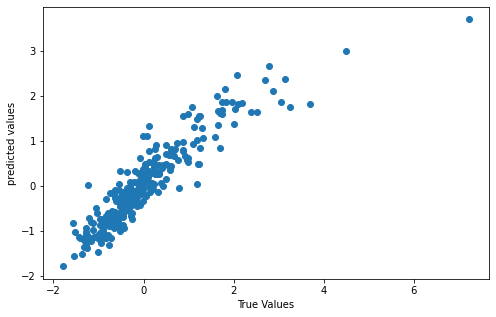

In [1207]:
testmodelprodiction.flatten()
plt.figure(figsize=(8,5))
plt.scatter(x=ytest,y=testmodelprodiction)
plt.xlabel('True Values')
plt.ylabel('predicted values')
plt.show()

In [414]:
house_test_data=pd.read_csv(r'C:\Users\tt172\Pictures\house-prices-advanced-regression-techniques\test.csv')
house_test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [415]:
house_test_data=house_test_data.drop(columns=['MSSubClass','MSZoning','LotFrontage','Street','LotShape',
                                    'LandContour','Utilities','LotConfig','LandSlope','Condition2',
                                    'BldgType','YearBuilt','RoofMatl','BsmtExposure','CentralAir',
                                    'Electrical','LowQualFinSF','GarageFinish','GarageCars','GarageQual',
                                    'GarageCond','PavedDrive','MiscVal','MoSold','SaleType',
                                    'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
                                   'Condition1','RoofStyle','MasVnrType','Exterior2nd','BsmtFinType2','BsmtFinSF2',
                                   'Heating','1stFlrSF','2ndFlrSF','Functional','GarageYrBlt','BsmtFinType1',
                                   'OverallCond','MasVnrArea','ExterCond','BsmtCond','BsmtUnfSF','GarageType',
                                   'GarageYrBlt','YrSold','BsmtFinSF1','LotArea','HouseStyle','Foundation','SaleCondition','WoodDeckSF',
                                    'BsmtHalfBath','HalfBath','KitchenAbvGr','ExterQual','BsmtQual',
                                   'HeatingQC','KitchenQual','Exterior1st','YearRemodAdd', 'Fireplaces',
                                   'PoolQC','MiscFeature','Fence','FireplaceQu','Alley','Id',
                                    'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','Neighborhood'])

In [416]:
house_test_data.head()

,OverallQual,TotalBsmtSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,GarageArea
0,5,882.0,896,2,5,730.0
1,6,1329.0,1329,3,6,312.0
2,5,928.0,1629,3,6,482.0
3,6,926.0,1604,3,7,470.0
4,8,1280.0,1280,2,5,506.0


In [326]:
print(house_test_data[house_test_data['BsmtFullBath'].isna()])

    Neighborhood  OverallQual  TotalBsmtSF  GrLivArea  BsmtFullBath  FullBath  \
660      BrkSide            4          NaN        896           NaN         1   
728      Edwards            5          0.0       3820           NaN         3   

     BedroomAbvGr  TotRmsAbvGrd  GarageArea  
660             2             4       280.0  
728             5            11       624.0  


In [417]:
house_test_data.isnull().sum()

OverallQual     0
TotalBsmtSF     1
GrLivArea       0
BedroomAbvGr    0
TotRmsAbvGrd    0
GarageArea      1
dtype: int64

In [418]:
house_test_data=house_test_data.fillna(0)

In [384]:
house_test_data.isnull().sum()

Neighborhood    0
OverallQual     0
TotalBsmtSF     0
GrLivArea       0
BedroomAbvGr    0
TotRmsAbvGrd    0
GarageArea      0
dtype: int64

In [385]:
from sklearn.preprocessing import OneHotEncoder
encode=OneHotEncoder()
x=encode.fit_transform(house_test_data.Neighborhood.values.reshape(-1,1)).toarray()
hotcode1=pd.DataFrame(x, columns=['Neighborhood_'+str(int(i))for i in range(x.shape[1])])

In [419]:
x_test_data= house_test_data[['GrLivArea','BedroomAbvGr','TotRmsAbvGrd','TotalBsmtSF','GarageArea']]

In [420]:
ss=preprocessing.StandardScaler()
scale_house_data=ss.fit_transform(pd.DataFrame(x_test_data))
scale_house_data[:5]

array([[-1.21558782, -1.02954254, -0.91833473, -0.36848416,  1.18551124],
       [-0.32353941,  0.17599724, -0.25537067,  0.63954187, -0.73851804],
       [ 0.29450799,  0.17599724, -0.25537067, -0.26474994,  0.0439819 ],
       [ 0.24300404,  0.17599724,  0.4075934 , -0.26926012, -0.01125339],
       [-0.42448715, -1.02954254, -0.91833473,  0.52904237,  0.15445248]])

In [421]:
overall_quality=house_test_data['OverallQual']

In [422]:
scale_house_data=pd.DataFrame(scale_house_data)

In [423]:
x_test_house_data=pd.concat([scale_house_data,overall_quality], axis=1)

In [424]:
x_test_house_data.sample(5)

,0,1,2,3,4,OverallQual
1233,-0.731451,0.175997,-0.255371,0.193034,-2.174636,6
586,-0.045418,1.381537,0.407593,-0.706748,-0.011253,5
1020,-0.918925,0.175997,-0.255371,-0.012180,-0.959459,5
168,0.292448,0.175997,0.407593,-1.491520,-0.379489,7
1181,-0.138125,-1.029543,-1.581299,0.995846,0.324761,6


In [425]:
xtrain_data=xhouse_data

In [426]:
xtest_data=x_test_house_data

In [427]:
ytrain_data=yhouse_data

In [428]:
xtrain_data=np.array(xtrain_data)
ytrain_data=np.array(ytrain_data)
xtest_data=np.array(xtest_data)

In [429]:
regr=linear_model.LinearRegression(fit_intercept=False)

In [430]:
regr.fit(xtrain_data,ytrain_data)

LinearRegression(fit_intercept=False)

In [431]:
trainmodelprediction=regr.predict(xtrain_data)

In [432]:
testmodelprodiction=regr.predict(xtest_data)

In [291]:
print('r2 score for training data %.2f'% r2_score(ytrain_data,trainmodelprediction))

NameError: name 'ytrain_data' is not defined

In [290]:
print('mae: ',mean_absolute_error(testmodelprodiction))

NameError: name 'mean_absolute_error' is not defined